In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Downloads/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.drop('Id', axis=1, inplace = True)

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#selecting only numerical columns
numerical_columns = df.select_dtypes(include=['number'])

#compute correlation matrix
correlation_matrix = numerical_columns.corr()

In [8]:
correlation_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


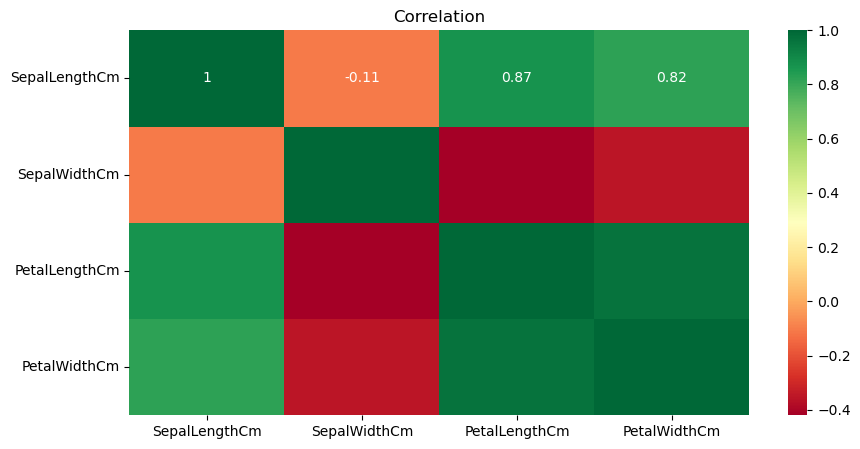

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title("Correlation")
plt.show()

In [13]:

df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [14]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [16]:
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [17]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [18]:
df.duplicated().sum()

3

In [22]:
df.drop_duplicates(inplace=True)

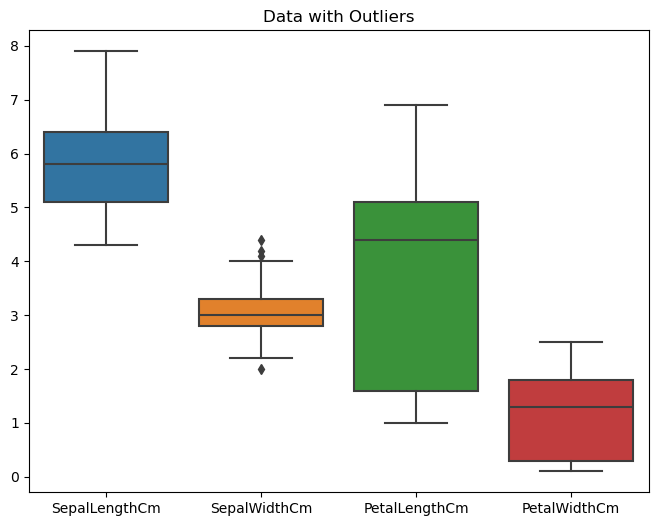

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.title("Data with Outliers")
plt.show()

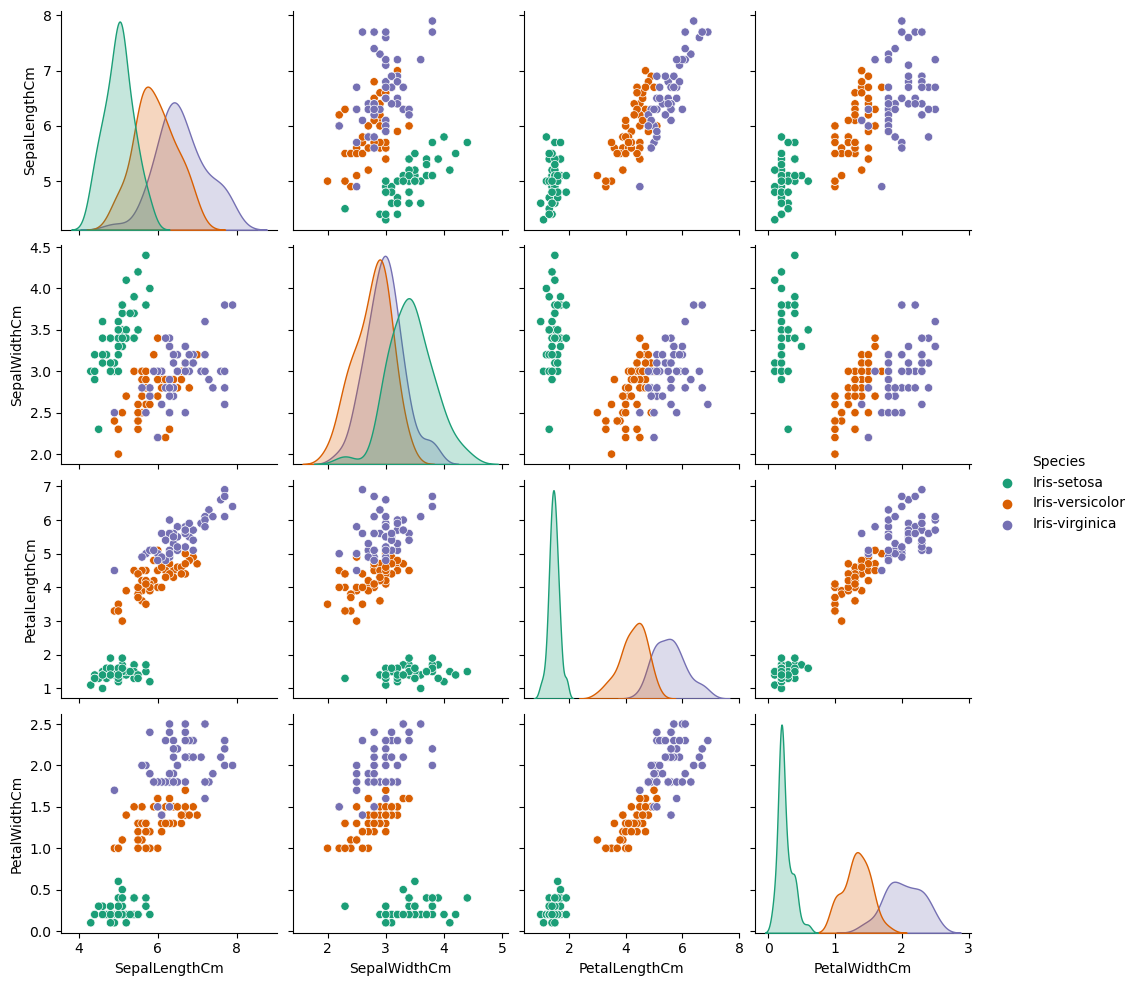

In [25]:
sns.pairplot(df, hue = 'Species', palette = 'Dark2')
plt.show()

# Model Building

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Species'], axis=1),df['Species'],test_size=0.2, random_state=1)

In [29]:
lmodel = LogisticRegression()
clf = lmodel.fit(X_train, y_train)

In [30]:
y_pred = clf.predict(X_test)

In [38]:
print(f"Accuracy Score: {accuracy_score(y_test,y_pred):.3f}")

Accuracy Score: 0.933


In [39]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.88      0.88      0.88         8

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [40]:
import pickle

In [41]:
with open('iris_model.pkl','wb') as file:
    pickle.dump(clf, file)